# [Consumer Business Complaints in Brazil 2016](https://www.kaggle.com/datasets/gerosa/procon)

Preparação dos dados e algoritmo de árvore de decisão para tentar predizer `Atendida`, que indica se a reclamação foi resolvida ou não.

Data preparation and decision tree algorithm to predict `Atendida`, that indicates if the complaint was resolved or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore") # Just to make the notebook cleaner, feel free to take it out

In [2]:
df = pd.read_csv("reclamacoes-fundamentadas-sindec-2016.csv")

In [3]:
df.head()

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,...,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
0,2016,2016-02-17 13:43:08.000,2015-10-29 10:59:59.000,2,Nordeste,PE,CVC BRASIL OPERADORA E AGENCIA DE VIAGENS S.A.,CVC,1,1.076026e+13,...,7911200.0,AGÊNCIAS DE VIAGENS,S,276,Agências e Operadoras de viagens (pacotes turí...,205.0,"Consulta Sobre Serviços (Pesquisa, cartilha, e...",M,entre 61 a 70 anos,52061540.0
1,2016,2016-12-15 18:11:35.000,2016-11-18 14:52:22.000,2,Nordeste,PE,GIORGIO ARMANI BRASIL COMERCIO,EMPORIO ARMANI,1,1.318050e+13,...,NaN,NaN,N,132,Vestuário ( Calçado / Roupa ),105.0,Produto com vício,F,entre 31 a 40 anos,51010140.0
2,2016,2016-09-16 09:01:46.000,2016-06-29 13:58:35.000,2,Nordeste,PE,COMPANHIA ENERGETICA DE PERNAMBUCO,CELPE,1,1.083593e+13,...,3514000.0,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,S,185,Energia Elétrica,134.0,Cobrança indevida/abusiva,F,entre 51 a 60 anos,53060600.0
3,2016,2016-02-18 13:30:30.000,2016-01-21 12:23:51.000,2,Nordeste,PE,MOURA DUBEUX,MOURA DUBEUX,1,1.204963e+13,...,4120400.0,CONSTRUÇÃO DE EDIFÍCIOS,S,82,Incorporação ( Construtoras e Incorporadoras ),88.0,Não entrega do contrato,M,entre 51 a 60 anos,53090220.0
4,2016,2016-11-09 14:20:36.000,2016-10-07 16:39:59.000,2,Nordeste,PE,ASSOCIAÇÃO UNIFICADA PAULISTA DE ENSINO RENOVADO,UNIP,1,NaN,...,NaN,NaN,S,233,"Escola ( Pré, 1º, 2º Graus e Superior )",199.0,"Documentos: não fornecimento (escolares, recib...",F,entre 21 a 30 anos,53437100.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203486 entries, 0 to 203485
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AnoCalendario          203486 non-null  int64  
 1   DataArquivamento       203486 non-null  object 
 2   DataAbertura           203486 non-null  object 
 3   CodigoRegiao           203486 non-null  int64  
 4   Regiao                 203486 non-null  object 
 5   UF                     203486 non-null  object 
 6   strRazaoSocial         203483 non-null  object 
 7   strNomeFantasia        173722 non-null  object 
 8   Tipo                   203486 non-null  int64  
 9   NumeroCNPJ             195292 non-null  float64
 10  RadicalCNPJ            195292 non-null  float64
 11  RazaoSocialRFB         187287 non-null  object 
 12  NomeFantasiaRFB        92561 non-null   object 
 13  CNAEPrincipal          187287 non-null  float64
 14  DescCNAEPrincipal      185784 non-nu

Datas estão no formato errado!

*Dates are the wrong dtypes*

In [5]:
df[["DataArquivamento", "DataAbertura"]].head()

,DataArquivamento,DataAbertura
0,2016-02-17 13:43:08.000,2015-10-29 10:59:59.000
1,2016-12-15 18:11:35.000,2016-11-18 14:52:22.000
2,2016-09-16 09:01:46.000,2016-06-29 13:58:35.000
3,2016-02-18 13:30:30.000,2016-01-21 12:23:51.000
4,2016-11-09 14:20:36.000,2016-10-07 16:39:59.000


In [6]:
df[["DataArquivamento", "DataAbertura"]] = df[["DataArquivamento", "DataAbertura"]].apply(pd.to_datetime)

In [7]:
df[["DataArquivamento", "DataAbertura"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203486 entries, 0 to 203485
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DataArquivamento  203486 non-null  datetime64[ns]
 1   DataAbertura      203486 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 3.1 MB


___
Agora vamos checar dados faltantes.

*Let's check for missing data.*

In [8]:
df.isna().sum()

AnoCalendario                 0
DataArquivamento              0
DataAbertura                  0
CodigoRegiao                  0
Regiao                        0
UF                            0
strRazaoSocial                3
strNomeFantasia           29764
Tipo                          0
NumeroCNPJ                 8194
RadicalCNPJ                8194
RazaoSocialRFB            16199
NomeFantasiaRFB          110925
CNAEPrincipal             16199
DescCNAEPrincipal         17702
Atendida                      0
CodigoAssunto                 0
DescricaoAssunto              0
CodigoProblema               10
DescricaoProblema            10
SexoConsumidor                2
FaixaEtariaConsumidor         0
CEPConsumidor             14086
dtype: int64

In [9]:
df.columns[df.isna().sum() > 0]

Index(['strRazaoSocial', 'strNomeFantasia', 'NumeroCNPJ', 'RadicalCNPJ',
       'RazaoSocialRFB', 'NomeFantasiaRFB', 'CNAEPrincipal',
       'DescCNAEPrincipal', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'CEPConsumidor'],
      dtype='object')

Exceto `'CEPConsumidor', 'CodigoProblema', 'DescricaoProblema', 'SexoConsumidor'`, todos são identificadores da empresa. `CEPConsumidor` não é muito impactante, pois temos UF e Região. O resto, podemos fazer imputação ou apenas retirar as linhas.

*The `'CEPConsumidor', 'CodigoProblema', 'DescricaoProblema', 'SexoConsumidor'` columns are regarding business identification. `CEPConsumidor` (Consumer's ZIP code) is not very impactful, once we have the state and region. For he rest of the columns, we can do imputation methods or drop the rows.*

___

## Algumas Análises Exploratórias
### *Some Exploratory Analysis*

Faixas etárias

*Age groups*

In [10]:
df["FaixaEtariaConsumidor"].value_counts()

entre 31 a 40 anos    45422
entre 41 a 50 anos    37963
entre 21 a 30 anos    33237
entre 51 a 60 anos    31717
entre 61 a 70 anos    22660
Nao Informada         16790
mais de 70 anos       10893
até 20 anos            4804
Name: FaixaEtariaConsumidor, dtype: int64

Tipos de Reclamações

*Complaint types*

In [11]:
df["CodigoProblema"].nunique()

255

Top 10 reclamações mais decorrentes e sua descrição

*Top 10 complaints and their description (in portuguese)*

In [12]:
df[["CodigoProblema"]].value_counts()[0:10]

CodigoProblema
105.0             47301
134.0             23194
28.0              19857
102.0             10614
194.0              9695
107.0              8544
27.0               5909
203.0              3496
116.0              3103
184.0              2824
dtype: int64

In [13]:
cod = []
for i in range(0, 10):
    cod.append(df[["CodigoProblema"]].value_counts()[0:10].index[i][0])

In [14]:
cod

[105.0, 134.0, 28.0, 102.0, 194.0, 107.0, 27.0, 203.0, 116.0, 184.0]

In [15]:
df[df["CodigoProblema"].isin(cod)]["DescricaoProblema"].unique()

array(['Produto com vício', 'Cobrança indevida/abusiva',
       'Contrato/pedido/orçamento (rescisão, descumprimento, erro, etc.)',
       'Contrato (não cumprimento, alteração, transferencia, irregularidade, rescisão, etc.)',
       'Contrato - Rescisão/alteração unilateral',
       'Serviço não fornecido (entrega/instalação/não cumprimento da oferta/contrato)',
       'Não entrega/demora na entrega do produto',
       'Garantia (Abrangência, cobertura, etc.)'], dtype=object)

Reclamações por mês

*Complaints by month*

In [16]:
df["MesAbertura"] = df["DataAbertura"].dt.month

In [17]:
plot = pd.DataFrame(df.groupby("MesAbertura")["CodigoAssunto"].count())

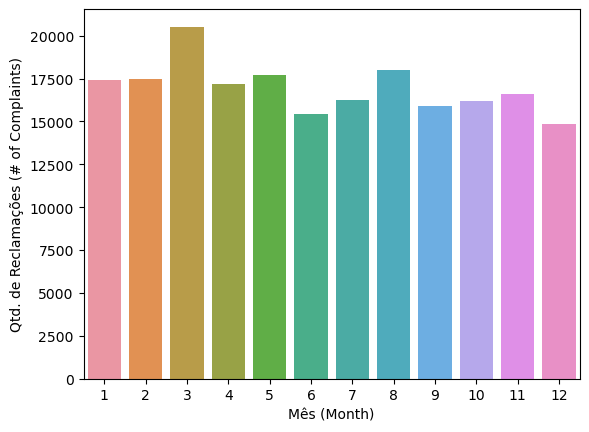

In [18]:
sns.barplot(data=plot, x=plot.index, y="CodigoAssunto")
plt.xlabel("Mês (Month)")
plt.ylabel("Qtd. de Reclamações (# of Complaints)")
plt.show()

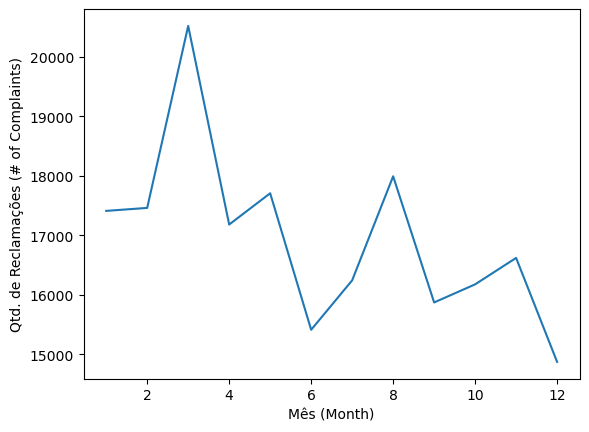

In [19]:
sns.lineplot(data=plot, x=plot.index, y="CodigoAssunto")
plt.xlabel("Mês (Month)")
plt.ylabel("Qtd. de Reclamações (# of Complaints)")
plt.show()

## Árvore de Decisão
### *Decision Tree*

Vamos selecionar algumas variáveis que nos interessam.

*Let's select some columns of interest.*

In [20]:
subset = df[["DataAbertura", "Regiao", "UF", 
    "Tipo", "Atendida", "CodigoAssunto", "CodigoProblema", 
    "SexoConsumidor", "FaixaEtariaConsumidor"]]

In [21]:
subset.head()

,DataAbertura,Regiao,UF,Tipo,Atendida,CodigoAssunto,CodigoProblema,SexoConsumidor,FaixaEtariaConsumidor
0,2015-10-29 10:59:59,Nordeste,PE,1,S,276,205.0,M,entre 61 a 70 anos
1,2016-11-18 14:52:22,Nordeste,PE,1,N,132,105.0,F,entre 31 a 40 anos
2,2016-06-29 13:58:35,Nordeste,PE,1,S,185,134.0,F,entre 51 a 60 anos
3,2016-01-21 12:23:51,Nordeste,PE,1,S,82,88.0,M,entre 51 a 60 anos
4,2016-10-07 16:39:59,Nordeste,PE,1,S,233,199.0,F,entre 21 a 30 anos


Vamos transformar `DataAbertura` e ficar apenas com o mês de reclamação e o dia da semana.

*Transform `DataAbertura` (date the complaint was made) so we only keep the month and the weekday.*

In [22]:
subset["MesAbertura"] = subset["DataAbertura"].dt.month
subset["DiaSemanaAb"] = subset["DataAbertura"].dt.weekday

subset.drop(["DataAbertura"], axis = 1, inplace = True)

In [23]:
subset.head()

,Regiao,UF,Tipo,Atendida,CodigoAssunto,CodigoProblema,SexoConsumidor,FaixaEtariaConsumidor,MesAbertura,DiaSemanaAb
0,Nordeste,PE,1,S,276,205.0,M,entre 61 a 70 anos,10,3
1,Nordeste,PE,1,N,132,105.0,F,entre 31 a 40 anos,11,4
2,Nordeste,PE,1,S,185,134.0,F,entre 51 a 60 anos,6,2
3,Nordeste,PE,1,S,82,88.0,M,entre 51 a 60 anos,1,3
4,Nordeste,PE,1,S,233,199.0,F,entre 21 a 30 anos,10,4


Transformar a variável de interesse `Atendida`.

*Transform the target variable `Atendida`, which indicates if the complaint was solved or not*

In [24]:
subset["Atendida"] = np.where(subset["Atendida"] == "S", 1, 0)

In [25]:
subset[["Atendida"]].head()

,Atendida
0,1
1,0
2,1
3,1
4,1


Retirando as observações com campos faltantes, vistas anteriormente.

*Remove rows with missing data, as we checked previously*

In [26]:
subset.dropna(subset = subset.columns[subset.isna().sum() > 0], inplace = True)

In [27]:
subset.isna().sum()

Regiao                   0
UF                       0
Tipo                     0
Atendida                 0
CodigoAssunto            0
CodigoProblema           0
SexoConsumidor           0
FaixaEtariaConsumidor    0
MesAbertura              0
DiaSemanaAb              0
dtype: int64

Transformar as colunas em dummies. **!!!:** Pouco prático porque tem muitas categorias, mas apenas para estudo preliminar faremos aqui.

*Transform columns into dummies. **!!!** Not efficient due too many categories, but for a preliminary study it can be made.*

In [28]:
def f(nome, subset):
    tmp = pd.get_dummies(subset[nome], drop_first=True, prefix=nome)
    subset = pd.concat([subset, tmp], axis=1)
    subset.drop([nome], axis = 1, inplace = True)
    return subset

In [29]:
for i in ['Regiao', 'UF', 'Tipo', 'CodigoAssunto', 'CodigoProblema', 'SexoConsumidor', 
          'FaixaEtariaConsumidor', "MesAbertura", "DiaSemanaAb"]:
    subset = f(i, subset)

In [30]:
subset.head()

,Atendida,Regiao_Nordeste,Regiao_Norte,Regiao_Sudeste,Regiao_Sul,UF_AM,UF_BA,UF_CE,UF_DF,UF_ES,...,MesAbertura_9,MesAbertura_10,MesAbertura_11,MesAbertura_12,DiaSemanaAb_1,DiaSemanaAb_2,DiaSemanaAb_3,DiaSemanaAb_4,DiaSemanaAb_5,DiaSemanaAb_6
0,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


Salvar os dados tratados (opcional).

*Save the clean data (optional).*

In [31]:
# subset.to_csv("cleanData.csv", index=False)

Divisão da base.

*Data splitting.*

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(subset.drop(['Atendida'], axis=1), 
                                                   subset['Atendida'], test_size=0.30, 
                                                    random_state=101)

Treino e ajuste do algoritmo.

*Algorithm training and fitting.*

In [33]:
dtc = DecisionTreeClassifier(random_state=10)

In [34]:
model = dtc.fit(X_train, y_train)

In [35]:
predictions = model.predict(X_test)

In [36]:
predictions

array([1, 1, 1, ..., 0, 1, 1])

Matriz de confusão.

*Confusion matrix.*

In [37]:
cnf_matrix = confusion_matrix(y_test, predictions, labels=[1,0])
cnf_matrix

array([[25913, 10405],
       [ 9459, 15266]], dtype=int64)

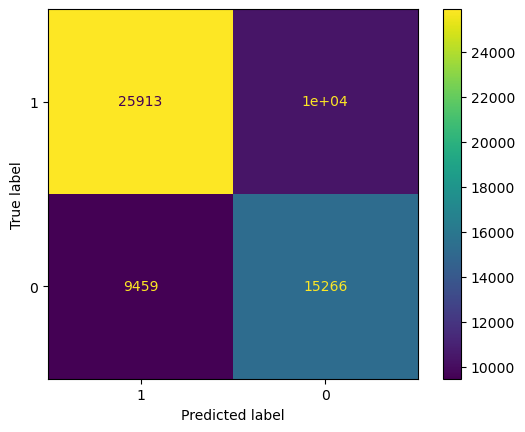

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, labels=[1,0])
plt.show()

In [39]:
cnf_matrix = confusion_matrix(y_test, predictions, labels=[1,0])
cnf_matrix

array([[25913, 10405],
       [ 9459, 15266]], dtype=int64)

Erro médio quadrático

*Root mean squared error (RMSE)*

In [40]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

0.5704471552349235

Análise da importância de variáveis. Importante para ir ajustando o modelo para dar continuidade ao estudo.

*Feature importance analysis. Important to adjust the model if we wish to continue the study.*

In [41]:
features = subset.columns
df_import_features = dict(zip(features, model.feature_importances_))
df_import_features = pd.DataFrame.from_dict(df_import_features, orient='index', columns = ['value'])
df_import_features = df_import_features.sort_values(['value'], ascending=False)
df_import_features.head(15)

,value
CodigoProblema_262.0,0.044045
MesAbertura_12,0.032477
DiaSemanaAb_1,0.031855
DiaSemanaAb_2,0.031267
FaixaEtariaConsumidor_entre 21 a 30 anos,0.030160
DiaSemanaAb_3,0.029514
FaixaEtariaConsumidor_entre 31 a 40 anos,0.028749
FaixaEtariaConsumidor_entre 41 a 50 anos,0.026030
FaixaEtariaConsumidor_até 20 anos,0.024358
MesAbertura_2,0.019989
